###FIFA 19 RATING PREDICTIONS###

Group 11


1.   Amrendra Pratap
2.   Avani Shrivatasava
3.   Harish Dechiraju
4.   Himanshu Verma
5.   Inshu Namdev
6.   Pulkit Pandey




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import plotly

Reading the fifaset

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

fifa = pd.read_csv('/content/drive/My Drive/data_reformed.csv')

Mounted at /content/drive


In [ ]:
fifa.head()

,Unnamed: 0,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Reactions,General,Mental,Mobility,Power,Shooting,Passing,Defending,Goalkeeping,Position
0,0,31,94,94,11050000.0,565000.0,2202,5.0,4.0,4.0,95.0,89,71,89,74,88,87,29,11,RF
1,1,33,94,94,7700000.0,405000.0,2228,5.0,4.0,5.0,96.0,88,73,89,83,88,81,27,12,ST
2,2,26,92,93,11850000.0,290000.0,2143,5.0,5.0,5.0,94.0,85,72,93,69,84,80,28,12,LW
3,3,27,91,93,7200000.0,260000.0,1471,4.0,3.0,1.0,90.0,26,43,58,54,21,39,16,89,GK
4,4,27,91,92,10200000.0,355000.0,2281,4.0,5.0,4.0,91.0,79,81,78,76,85,92,59,11,RCM


In [ ]:
fifa.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
dat = fifa.copy()
goalkeeper = fifa.loc[fifa['Position'] == 'GK']
drop = fifa.index[fifa['Position'] == 'GK'].tolist()

In [ ]:
fifa.drop(drop, axis =0, inplace = True)

In [ ]:
goalkeeper.drop(['Skill Moves', 'Position'], axis = 1, inplace = True)


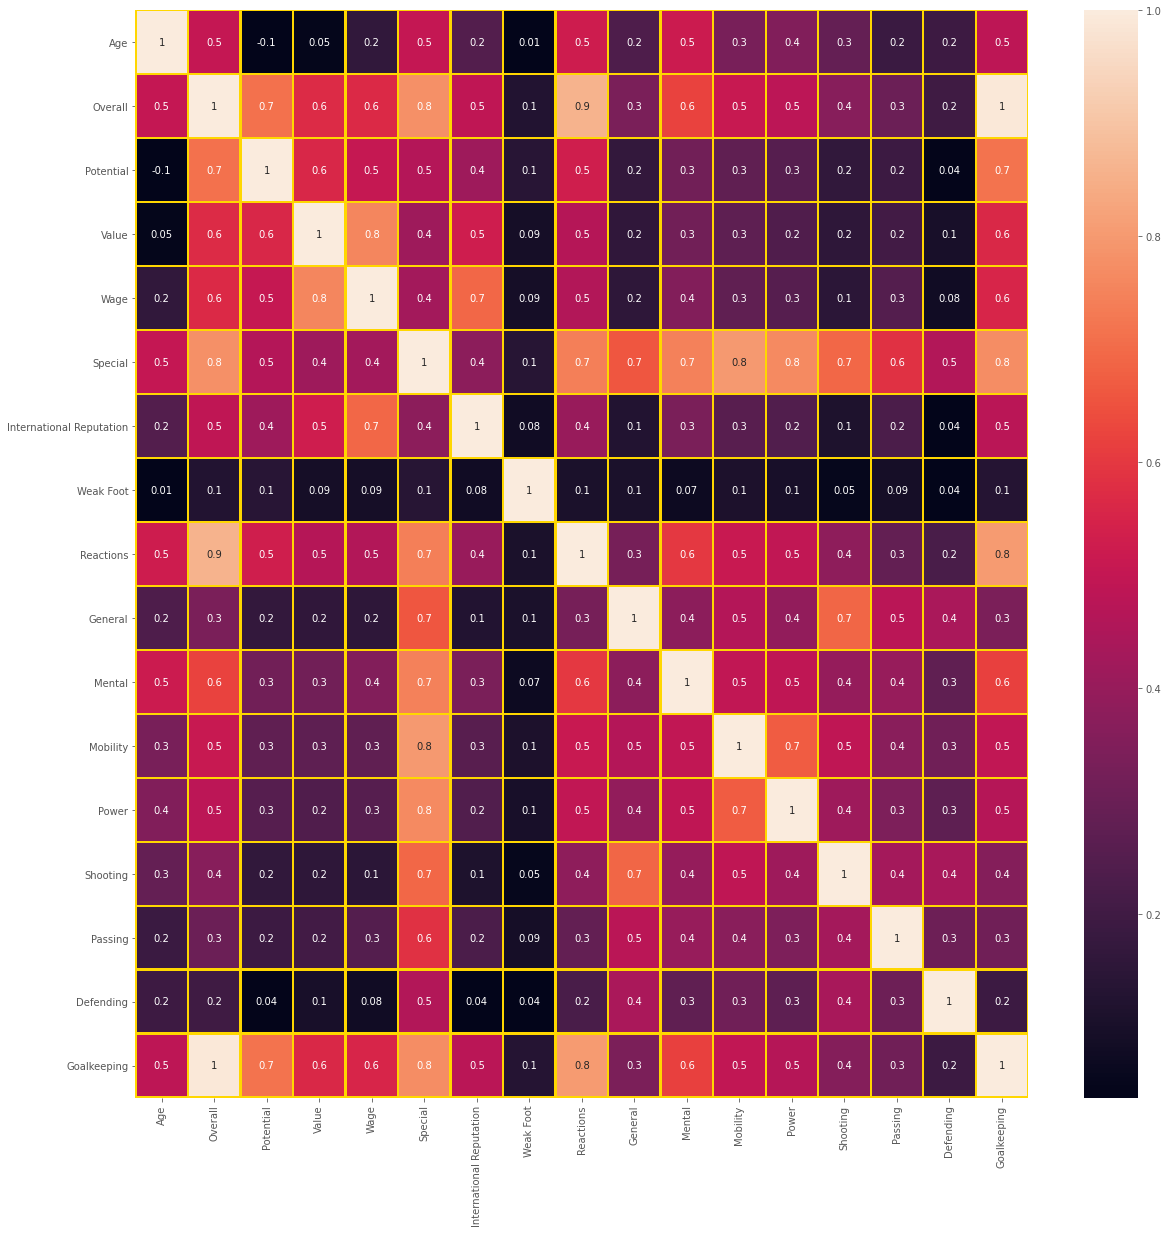

In [ ]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(goalkeeper.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True);

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR,SVR
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models


# Goalkeepers Prediction


In [ ]:
X= goalkeeper.drop("Overall",1)
Y =goalkeeper["Overall"]

In [ ]:
#NORMALISING USING STANDARD SCALER

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)

X_norm=scaler.transform(X)

data=pd.DataFrame(X_norm)

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03,2.025000e+03
mean,-2.145664e-15,-1.211582e-15,1.713033e-15,9.958563e-16,1.758813e-16,3.931615e-15,3.956396e-15,1.195203e-16,7.364205e-16,1.042349e-15,-5.674473e-16,-1.814735e-15,1.068665e-15,-3.378368e-16,7.214257e-16,2.956209e-16
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-1.838218e+00,-3.420702e+00,-7.980234e-01,-4.070444e-01,-2.396473e+00,-2.560816e-01,-2.234762e+00,-2.808366e+00,-2.395837e+00,-2.847320e+00,-2.498527e+00,-3.332481e+00,-2.485405e+00,-2.687516e+00,-3.174748e+00,-2.448086e+00
25%,-7.400593e-01,-7.530611e-01,-5.376359e-01,-3.472197e-01,-7.390397e-01,-2.560816e-01,-7.347975e-01,-6.724620e-01,-8.447244e-01,-7.593885e-01,-7.351592e-01,-5.751810e-01,-7.668942e-01,-6.407293e-01,-8.310132e-01,-7.941578e-01
50%,-1.909801e-01,-1.253810e-01,-2.555494e-01,-2.873949e-01,1.048825e-01,-2.560816e-01,7.651671e-01,1.042302e-01,8.594313e-02,-6.341126e-02,9.466097e-02,5.303189e-03,9.236111e-02,-8.251469e-02,-1.613746e-01,3.280631e-02
75%,7.241518e-01,6.592191e-01,2.652256e-01,-4.809611e-02,6.979089e-01,-2.560816e-01,7.651671e-01,7.838358e-01,7.063882e-01,8.065603e-01,7.170261e-01,7.309085e-01,6.651980e-01,4.756999e-01,5.082639e-01,5.841157e-01
max,3.469548e+00,3.640700e+00,1.482523e+01,1.514738e+01,3.244881e+00,1.043598e+01,3.765096e+00,3.016826e+00,5.049503e+00,3.590469e+00,2.999032e+00,2.617482e+00,6.393567e+00,4.941417e+00,6.535011e+00,3.478490e+00


In [ ]:
from sklearn import datasets, linear_model, metrics
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
linear_predict = lr.predict(X_test)
linear_mae = mean_absolute_error(y_test,linear_predict)
linear_mse = mean_squared_error(y_test,linear_predict)
linear_r2 = r2_score(y_test,linear_predict)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
poly_predict = poly_reg.predict(X_test_poly)
poly_mae = mean_absolute_error(y_test,poly_predict)
poly_mse = mean_squared_error(y_test,poly_predict)
poly_r2 = r2_score(y_test,poly_predict)


dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train,y_train)
dtree_predict = dtree.predict(X_test)
dtree_mae = mean_absolute_error(y_test,dtree_predict)
dtree_mse = mean_squared_error(y_test,dtree_predict)
dtree_r2 = r2_score(y_test,dtree_predict)



rf = RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test,rf_predict)
rf_mse = mean_squared_error(y_test,rf_predict)
rf_r2 =  r2_score(y_test,rf_predict)



svr_linear = LinearSVR()
svr_linear.fit(X_train,y_train)
svr_linear_predict = svr_linear.predict(X_test)
svr_linear_mae = mean_absolute_error(y_test,svr_linear_predict)
svr_linear_mse = mean_squared_error(y_test,svr_linear_predict)
svr_linear_r2 = r2_score(y_test,svr_linear_predict)


logr = LogisticRegression()
logr.fit(X_train,y_train)
logr_predict = logr.predict(X_test)
logr_mae = mean_absolute_error(y_test,logr_predict)
logr_mse = mean_squared_error(y_test,logr_predict)
logr_r2 = r2_score(y_test,logr_predict)



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

knn_mae = mean_absolute_error(y_test,knn_predict)
knn_mse = mean_squared_error(y_test,knn_predict)
knn_r2 = r2_score(y_test,knn_predict)



model = xgb.XGBRegressor()
model.fit(X_train,y_train)
xgb_predict = model.predict(data=X_test)

xgb_mae = mean_absolute_error(y_test,xgb_predict)
xgb_mse = mean_squared_error(y_test,xgb_predict)
xgb_r2 = r2_score(y_test,xgb_predict)


r2_scores = [linear_r2,poly_r2,dtree_r2,rf_r2,svr_linear_r2, logr_r2, knn_r2,xgb_r2]
mean_absolute_errors = [linear_mae,poly_mae,dtree_mae,rf_mae,svr_linear_mae, logr_mae, knn_mae, xgb_mae]
mean_squared_errors = [linear_mse,poly_mse,dtree_mse,rf_mse,svr_linear_mse, logr_mse, knn_mse, xgb_mse]
models = ['Linear','Polynomial','Decision Tree','Random Forest','Linear SVR', 'Logistical Regression', 'KNN', 'XGBoost']
model_accuracy = pd.DataFrame({'model' : models,
                               'R2 score' : r2_scores,
                              'Mean absolute error' : mean_absolute_errors,
                               'Mean squared error' : mean_squared_errors})
model_accuracy


[13:18:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,R2 score,Mean absolute error,Mean squared error
0,Linear,0.990977,0.562145,0.527695
1,Polynomial,0.992635,0.516911,0.430756
2,Decision Tree,0.981215,0.680921,1.098684
3,Random Forest,0.989619,0.584868,0.607138
4,Linear SVR,0.990855,0.565347,0.534870
5,Logistical Regression,0.936923,1.422697,3.689145
6,KNN,0.843306,2.368421,9.164474
7,XGBoost,0.990276,0.583638,0.568724


# Overall Rating Outfield Players



In [ ]:
fifa.drop(['Position', 'Goalkeeping'], axis = 1, inplace = True)

In [ ]:
X= fifa.drop("Overall",1)
Y =fifa["Overall"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler().fit(X)

X_norm=scaler.transform(X)

data=pd.DataFrame(X_norm)

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04,1.613400e+04
mean,2.020757e-14,1.096502e-15,2.249774e-15,1.774462e-14,5.712962e-16,4.251809e-14,-2.613894e-14,8.620910e-14,-5.733383e-14,3.854884e-15,-2.156310e-14,1.066912e-15,-1.564344e-14,-1.240361e-15,6.360696e-15,-1.197013e-14
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-1.980422e+00,-3.868755e+00,-8.905725e-01,-4.484019e-01,-3.394563e+00,-2.911456e-01,-3.147842e+00,-2.479872e+00,-4.699621e+00,-4.923331e+00,-3.159120e+00,-4.015612e+00,-4.451130e+00,-2.834921e+00,-3.504497e+00,-2.230906e+00
25%,-8.810356e-01,-7.421448e-01,-5.646341e-01,-4.041051e-01,-7.181870e-01,-2.911456e-01,-7.396611e-03,-8.613341e-01,-7.074059e-01,-6.734765e-01,-6.876171e-01,-5.958093e-01,-6.981088e-01,-7.095718e-01,-6.178377e-01,-8.905887e-01
50%,-1.526358e-03,-8.391112e-02,-2.115342e-01,-3.155114e-01,1.450919e-02,-2.911456e-01,-7.396611e-03,-8.613341e-01,-2.302617e-02,-2.446939e-03,-1.357089e-02,5.118035e-02,8.377073e-02,7.759448e-02,1.271066e-01,3.380353e-01
75%,6.581056e-01,5.743225e-01,2.864273e-01,-4.973031e-02,7.014119e-01,-2.911456e-01,-7.396611e-03,7.572036e-01,6.613536e-01,6.685827e-01,6.604753e-01,6.981700e-01,7.092743e-01,7.073275e-01,6.858149e-01,7.848077e-01
max,3.516511e+00,3.865491e+00,2.056704e+01,2.457932e+01,3.454111e+00,9.799818e+00,3.133049e+00,3.994279e+00,3.855126e+00,3.464539e+00,3.244319e+00,2.546712e+00,3.211289e+00,2.911393e+00,3.200002e+00,2.292664e+00


In [ ]:
from sklearn import datasets, linear_model, metrics
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
linear_predict = lr.predict(X_test)
linear_mae = mean_absolute_error(y_test,linear_predict)
linear_mse = mean_squared_error(y_test,linear_predict)
linear_r2 = r2_score(y_test,linear_predict)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
poly_predict = poly_reg.predict(X_test_poly)
poly_mae = mean_absolute_error(y_test,poly_predict)
poly_mse = mean_squared_error(y_test,poly_predict)
poly_r2 = r2_score(y_test,poly_predict)


dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train,y_train)
dtree_predict = dtree.predict(X_test)
dtree_mae = mean_absolute_error(y_test,dtree_predict)
dtree_mse = mean_squared_error(y_test,dtree_predict)
dtree_r2 = r2_score(y_test,dtree_predict)



rf = RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test,rf_predict)
rf_mse = mean_squared_error(y_test,rf_predict)
rf_r2 =  r2_score(y_test,rf_predict)



svr_linear = LinearSVR()
svr_linear.fit(X_train,y_train)
svr_linear_predict = svr_linear.predict(X_test)
svr_linear_mae = mean_absolute_error(y_test,svr_linear_predict)
svr_linear_mse = mean_squared_error(y_test,svr_linear_predict)
svr_linear_r2 = r2_score(y_test,svr_linear_predict)


logr = LogisticRegression()
logr.fit(X_train,y_train)
logr_predict = logr.predict(X_test)
logr_mae = mean_absolute_error(y_test,logr_predict)
logr_mse = mean_squared_error(y_test,logr_predict)
logr_r2 = r2_score(y_test,logr_predict)



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

knn_mae = mean_absolute_error(y_test,knn_predict)
knn_mse = mean_squared_error(y_test,knn_predict)
knn_r2 = r2_score(y_test,knn_predict)



model = xgb.XGBRegressor()
model.fit(X_train,y_train)
xgb_predict = model.predict(data=X_test)

xgb_mae = mean_absolute_error(y_test,xgb_predict)
xgb_mse = mean_squared_error(y_test,xgb_predict)
xgb_r2 = r2_score(y_test,xgb_predict)



r2_scores = [linear_r2,poly_r2,dtree_r2,rf_r2,svr_linear_r2, logr_r2, knn_r2,xgb_r2]
mean_absolute_errors = [linear_mae,poly_mae,dtree_mae,rf_mae,svr_linear_mae, logr_mae, knn_mae, xgb_mae]
mean_squared_errors = [linear_mse,poly_mse,dtree_mse,rf_mse,svr_linear_mse, logr_mse, knn_mse, xgb_mse]
models = ['Linear','Polynomial','Decision Tree','Random Forest','Linear SVR', 'Logistical Regression', 'KNN', 'XGBoost']
model_accuracy = pd.DataFrame({'model' : models,
                               'R2 score' : r2_scores,
                              'Mean absolute error' : mean_absolute_errors,
                               'Mean squared error' : mean_squared_errors})
model_accuracy


[13:18:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,model,R2 score,Mean absolute error,Mean squared error
0,Linear,0.912367,1.578115,4.042242
1,Polynomial,0.970741,0.871156,1.349618
2,Decision Tree,0.965410,0.520140,1.595538
3,Random Forest,0.986390,0.437182,0.627779
4,Linear SVR,0.911308,1.570866,4.091097
5,Logistical Regression,0.919651,1.363355,3.706259
6,KNN,0.897120,1.617228,4.745507
7,XGBoost,0.968682,0.899759,1.444617
